In [2]:
# import some libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the test dataset
test_data=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
# load the train dataset
train_data=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
train_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
# drop the ID column from both dataset
test_data.drop(columns=['ID'],axis=1,inplace=True)
train_data.drop(columns=['ID'],axis=1,inplace=True)

In [6]:
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [7]:
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [8]:
# check the datatype of train data
train_data.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [9]:
'''here we see that In dataset (age,balance,day,duration,campaign,pdays,previous) is a integer datatype ,rest are object datatype'''

'here we see that In dataset (age,balance,day,duration,campaign,pdays,previous) is a integer datatype ,rest are object datatype'

In [10]:
# check the null values of train data
train_data.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

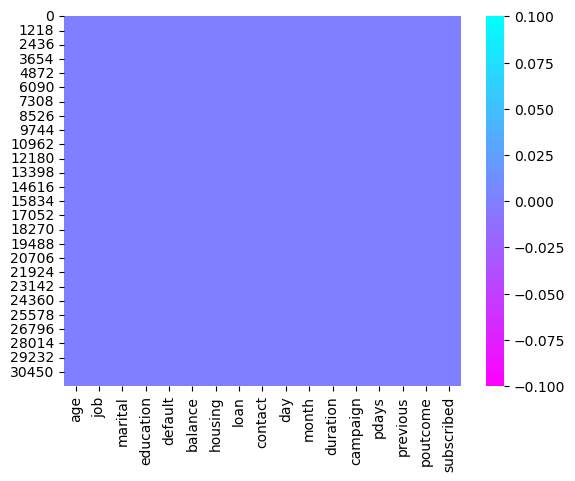

In [11]:
# visualize the null values of train data
sns.heatmap(train_data.isnull(),cmap='cool_r')

In [12]:
# check the null values of test data
test_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [13]:
'''In dataset there is no any null values present in both dataseets'''

'In dataset there is no any null values present in both dataseets'

In [14]:
# Check the white spaces for train data
train_data.isin([' ','?','-','null','NA']).sum().any()

False

In [15]:
# Check the white spaces for test data
test_data.isin([' ','?','-','null','NA']).sum().any()

False

In [16]:
# check the duplicated values for train data
train_data.duplicated().sum()

0

In [17]:
# check the duplicated values for test data
test_data.duplicated().sum()

0

In [18]:
# Checked the values counts in each column.
for col in train_data.columns:
    print(train_data[col].value_counts())
    print('-----------------------------')

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64
-----------------------------
job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64
-----------------------------
marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64
-----------------------------
education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64
-----------------------------
default
no     31062
yes      585
Name: count, dtype: int64
-----------------------------
balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905 

In [19]:
'''here subscribed is a target column and this is a binary classification so we can say that this is a classification problem '''

'here subscribed is a target column and this is a binary classification so we can say that this is a classification problem '

In [20]:
# checking number of unique values in each column for train data
train_data.nunique().to_frame("No. of unique vlaues")

,No. of unique vlaues
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


In [21]:
# convert the dataset feature in categorical and numerical column
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

In [22]:
# Check the numeric features name
numeric_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [23]:
# check the categorical features name
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

# Statistics of dataset

In [24]:
# describe the dataset
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [25]:
'''here we can observe that i have a outliers in every column.
some feature have skewness as like in age,balance,duration,pdays columns.'''

'here we can observe that i have a outliers in every column.\nsome feature have skewness as like in age,balance,duration,pdays columns.'

# Visualization

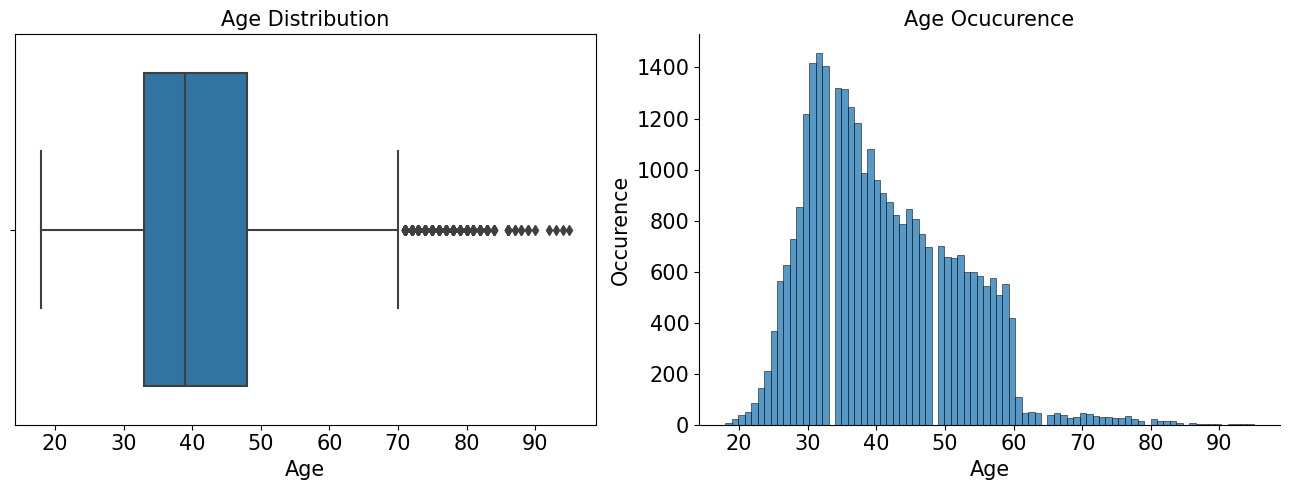

In [26]:
# visualize the age distributiion with boxplot and histplot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = train_data, orient = 'h', ax = ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.histplot(train_data['age'],ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [27]:
# here in age column have a right skewness and outliers.and we get highest people in 30--40 age distribute.

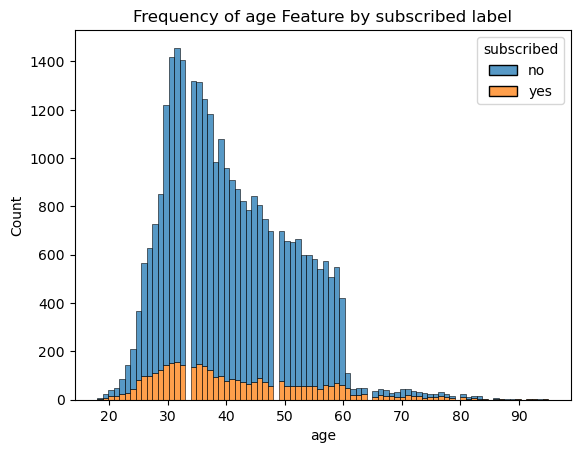

In [28]:
# visualize the age column with subsribed label.
sns.histplot(data=train_data, x='age', hue='subscribed', multiple='stack')
plt.title('Frequency of age Feature by subscribed label')
plt.show()

In [29]:
'''here we see highest subscibe person in the age of 30 - 40 years.'''

'here we see highest subscibe person in the age of 30 - 40 years.'

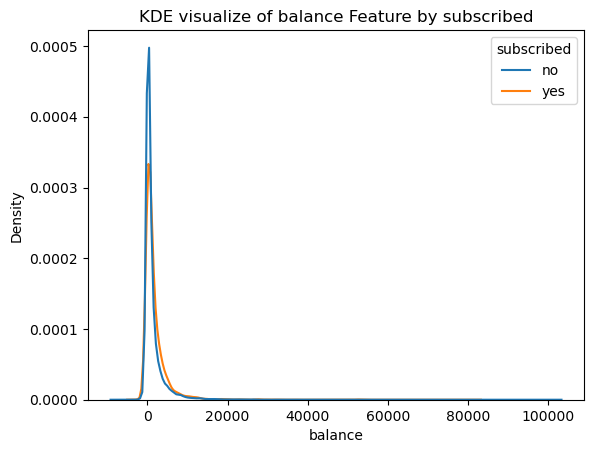

In [30]:
sns.kdeplot(data=train_data, x='balance', hue='subscribed', common_norm=False)
plt.title('KDE visualize of balance Feature by subscribed')
plt.show()

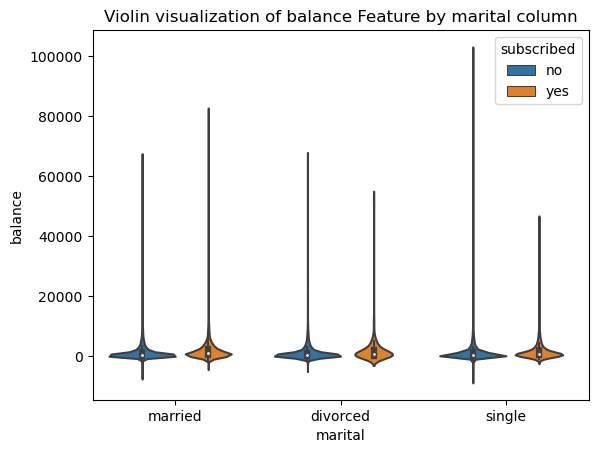

In [31]:
sns.violinplot(x='marital', y='balance', hue='subscribed',data=train_data)
plt.title('Violin visualization of balance Feature by marital column')
plt.show()

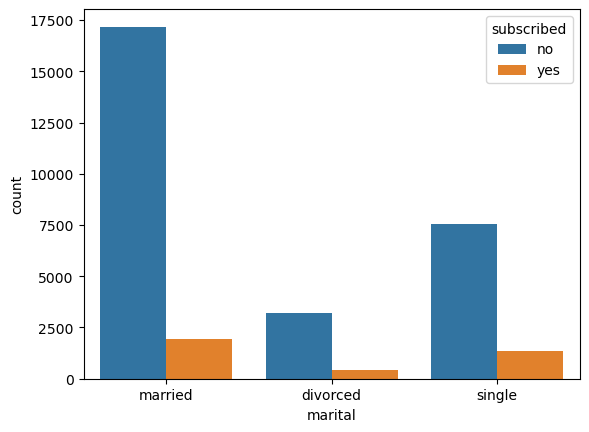

In [36]:
# visualize the marital with subscribed.
sns.countplot(data=train_data,x='marital',hue='subscribed')
plt.show()

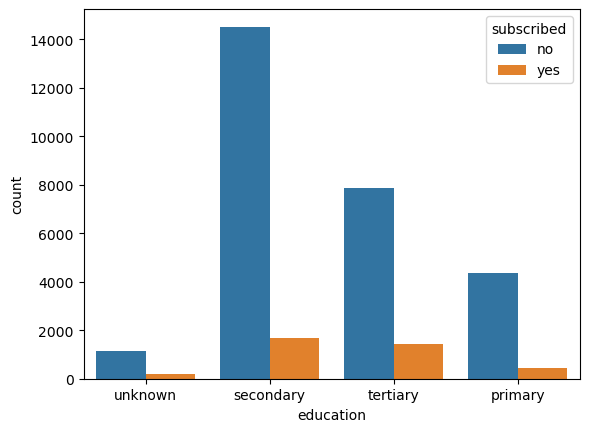

In [37]:
# visualize the education with subscribed.
sns.countplot(data=train_data,x='education',hue='subscribed')
plt.show()

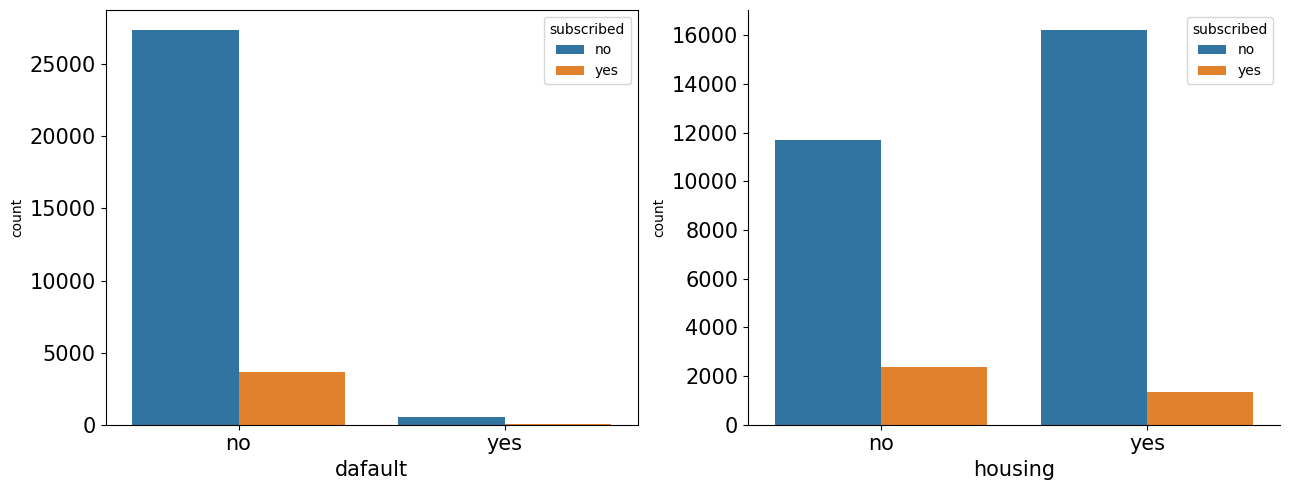

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.countplot(x = 'default', data = train_data, hue='subscribed',ax = ax1)
ax1.set_xlabel('dafault', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(data=train_data,x='housing',hue='subscribed',ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('housing', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

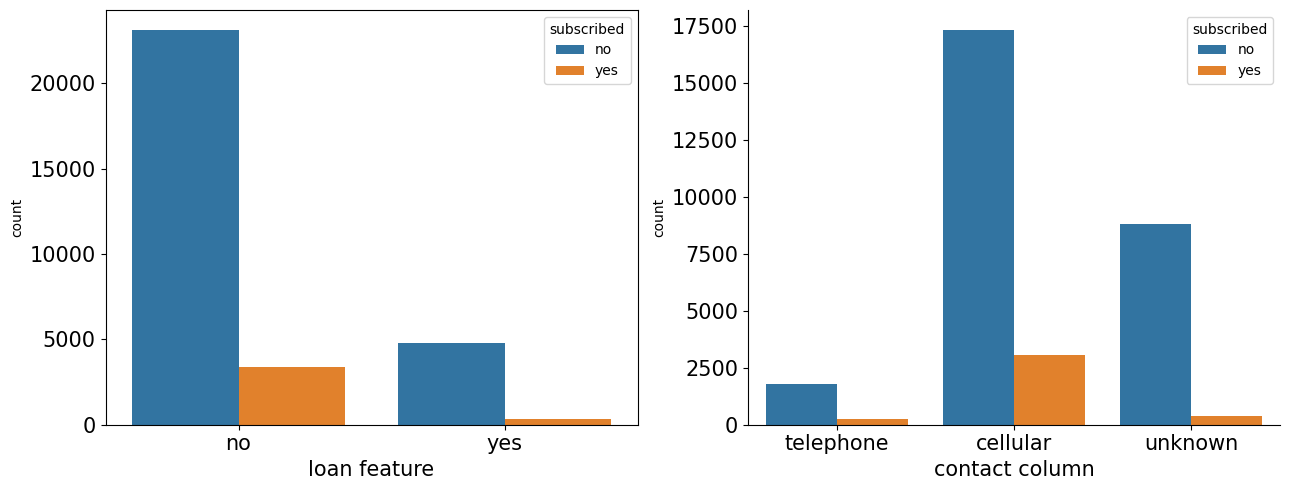

In [40]:
# visualize the data of loan and contact feature with subscribed
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.countplot(x = 'loan', data = train_data, hue='subscribed',ax = ax1)
ax1.set_xlabel('loan feature', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(data=train_data,x='contact',hue='subscribed',ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('contact column', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

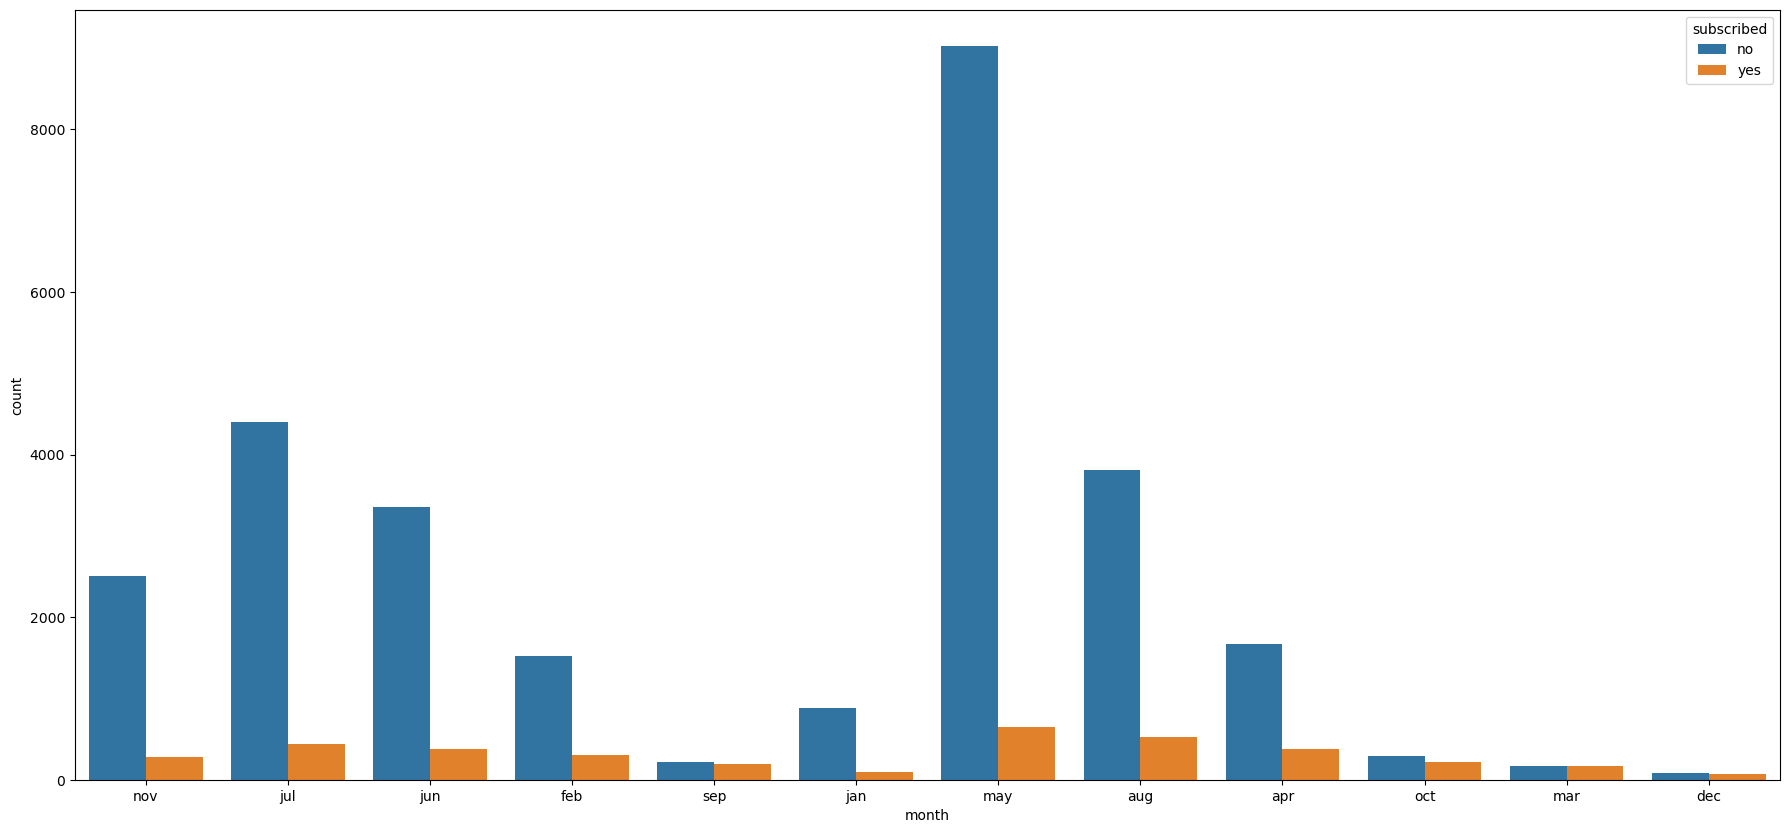

In [50]:
# Visualize the month wise data
plt.figure(figsize=(22,10))
sns.countplot(data=train_data,x='month',hue='subscribed')
plt.show()

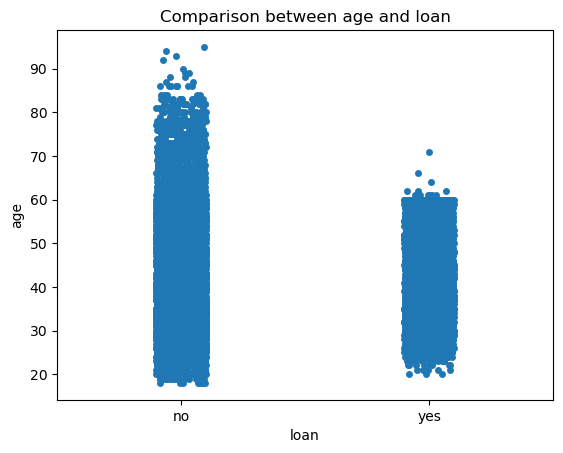

In [53]:
# comparing age and loan
plt.title("Comparison between age and loan")
sns.stripplot(x="loan",y="age",data=train_data)
plt.show()

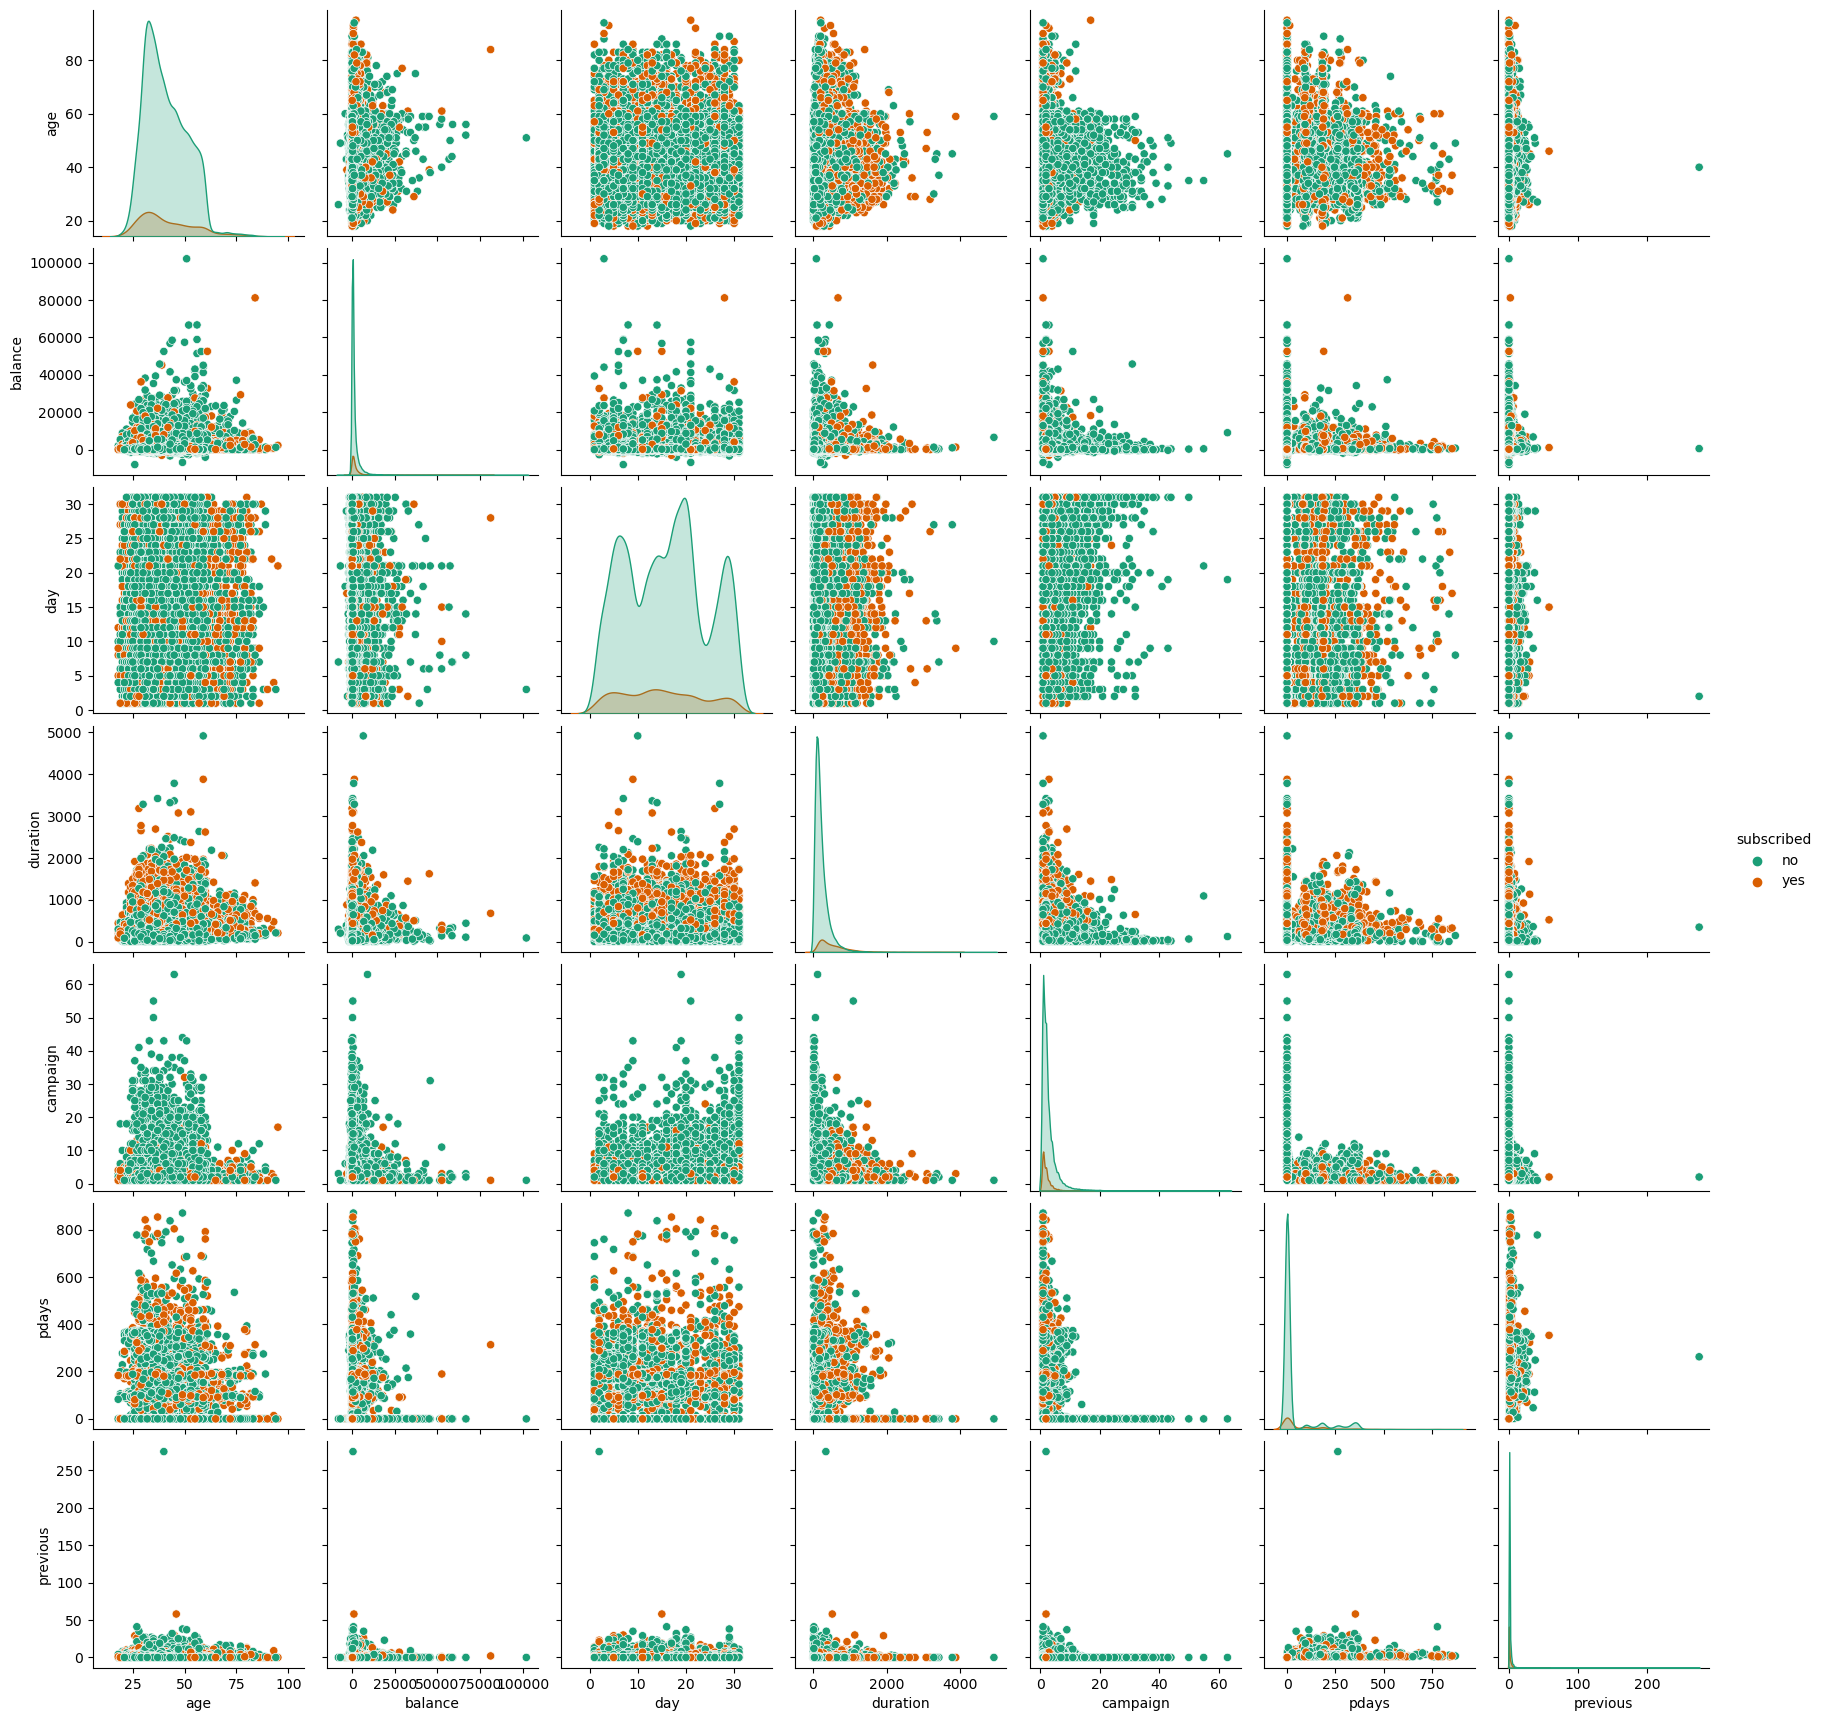

In [55]:
sns.pairplot(train_data,hue="subscribed",palette="Dark2")
plt.show()

In [58]:
def replace_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    median = np.mean(column)
    column = column.apply(lambda x: median if x > upper or x < lower else x)
    return column

# Assuming out_df is your DataFrame and you want to apply this to specific columns
columns_to_check = ['age','balance','day','duration','campaign','pdays','previous']  # replace with your column names

for col in columns_to_check:
    train_data[col] = replace_outliers(train_data[col])

<Axes: xlabel='age', ylabel='Density'>

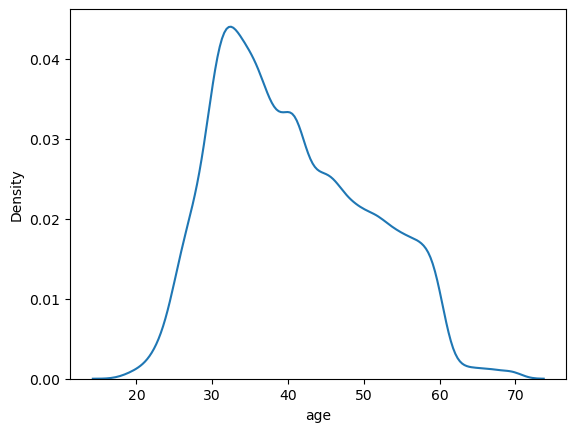

In [59]:
sns.kdeplot(train_data['age'])

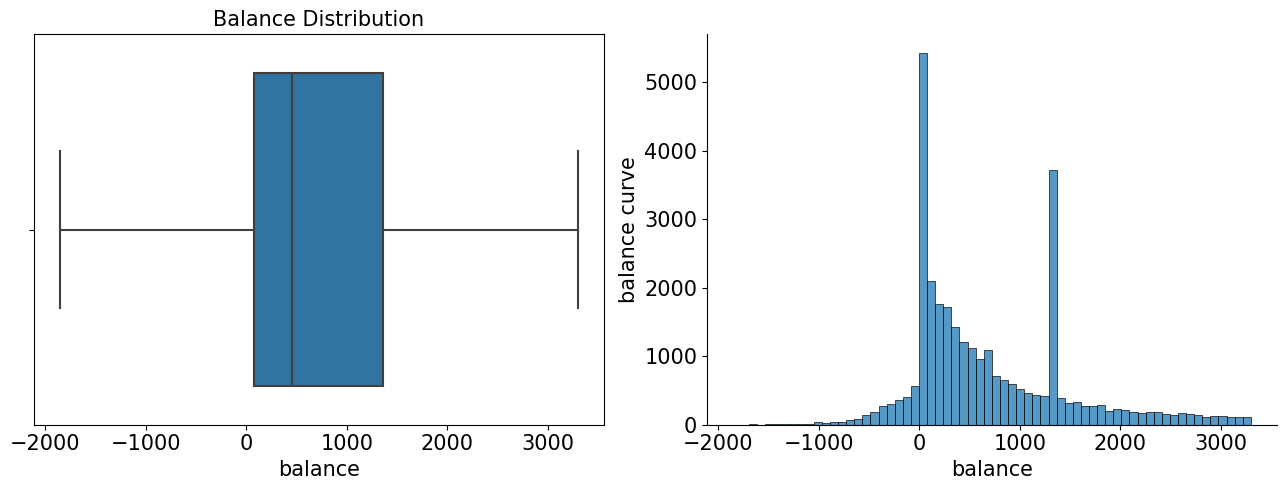

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'balance', data = train_data, orient = 'h', ax = ax1)
ax1.set_xlabel('balance', fontsize=15)
ax1.set_title('Balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.histplot(train_data['balance'],ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('balance', fontsize=15)
ax2.set_ylabel('balance curve', fontsize=15)
ax2.set_title('', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

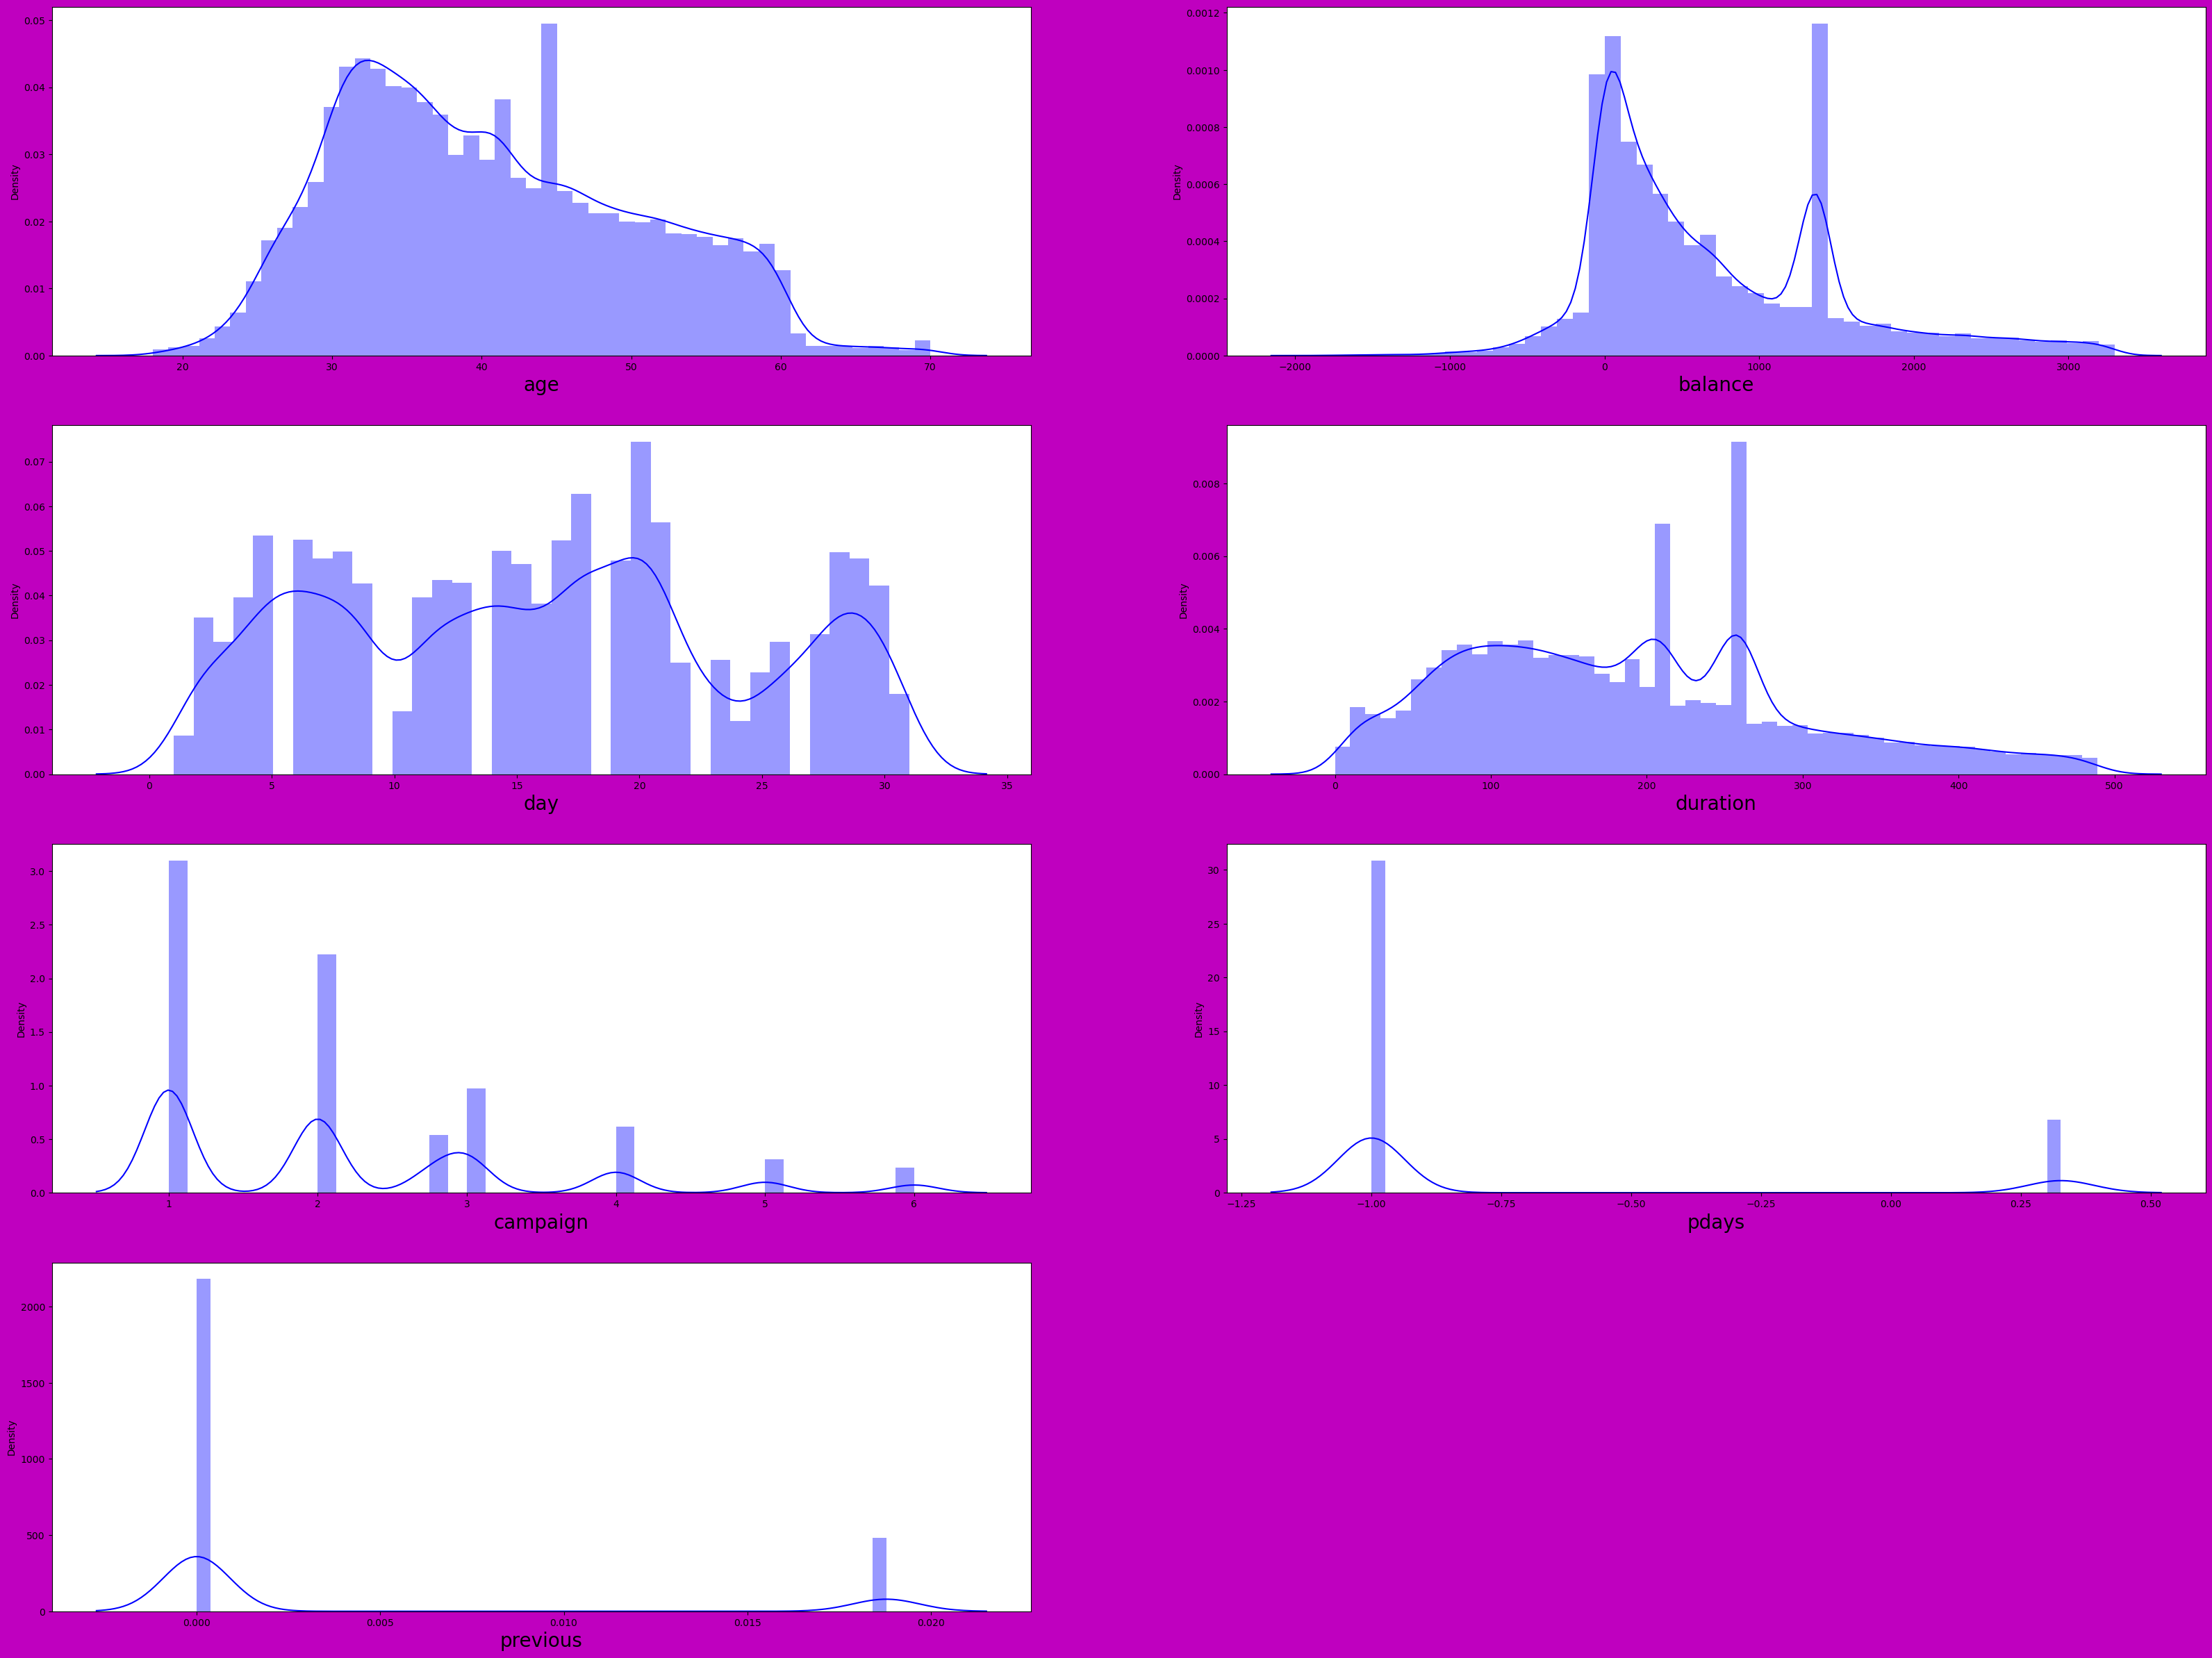

In [61]:
# checking how the data has been distributed in each column
plt.figure(figsize=(40,30),facecolor="m")
plotnumber=1
for column in numeric_features:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(train_data[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [62]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
oe=LabelEncoder()
for col in train_data.columns:
    if(train_data[col].dtypes=='object'):
        train_data[col]=oe.fit_transform(train_data[col].values.reshape(-1,1))
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56.0,0,1,3,0,1933.0,0,0,1,19,9,44.000000,2.000000,-1.000000,0.00000,3,0
1,31.0,11,1,1,0,3.0,0,0,0,20,5,91.000000,2.000000,-1.000000,0.00000,3,0
2,27.0,7,1,1,0,891.0,1,0,0,18,5,240.000000,1.000000,-1.000000,0.00000,3,0
3,57.0,4,0,2,0,3287.0,0,0,0,22,6,258.113534,1.000000,0.326942,0.01878,2,1
4,31.0,9,1,1,0,119.0,1,0,0,4,3,380.000000,1.000000,-1.000000,0.00000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29.0,4,2,2,0,0.0,1,0,0,12,8,116.000000,2.000000,-1.000000,0.00000,3,0
31643,53.0,4,0,2,0,380.0,0,1,0,5,6,438.000000,2.000000,-1.000000,0.00000,3,1
31644,32.0,4,2,2,0,312.0,0,0,0,7,1,37.000000,3.000000,-1.000000,0.00000,3,0
31645,57.0,9,1,1,0,225.0,1,0,1,15,8,22.000000,2.765697,0.326942,0.01878,0,0


In [63]:
# check the skewness
train_data.skew()

age           0.415096
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       0.959314
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.559430
campaign      1.153909
pdays         1.658558
previous      1.658558
poutcome     -1.996421
subscribed    2.377445
dtype: float64

# Check the correlation

In [64]:
corr_check=train_data.corr()

In [65]:
corr_check

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.029542,-0.409553,-0.092446,-0.012525,0.090724,-0.154113,0.003641,0.035672,-0.006480,-0.040955,-0.036942,0.035977,-0.020232,-0.020232,0.018811,-0.010913
job,-0.029542,1.000000,0.066124,0.170347,-0.005217,0.022010,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002465,0.007717,0.000494,0.000494,0.007101,0.038921
marital,-0.409553,0.066124,1.000000,0.107547,-0.009591,0.012423,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.021957,-0.030600,0.027990,0.027990,-0.019770,0.046043
education,-0.092446,0.170347,0.107547,1.000000,-0.006774,0.061120,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,-0.001775,-0.011905,0.033341,0.033341,-0.019007,0.066051
default,-0.012525,-0.005217,-0.009591,-0.006774,1.000000,-0.139951,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.004779,0.007710,-0.039490,-0.039490,0.035067,-0.020168
balance,0.090724,0.022010,0.012423,0.061120,-0.139951,1.000000,-0.072651,-0.109524,-0.039557,0.001604,-0.001554,0.030850,-0.029459,0.071512,0.071512,-0.056177,0.091858
housing,-0.154113,-0.125347,-0.017846,-0.095376,-0.011823,-0.072651,1.000000,0.036244,0.195103,-0.025666,0.271442,-0.004595,-0.031992,0.055702,0.055702,-0.092677,-0.141092
loan,0.003641,-0.039049,-0.041654,-0.045950,0.081567,-0.109524,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.011929,0.004510,-0.027595,-0.027595,0.010919,-0.072266
contact,0.035672,-0.078253,-0.040180,-0.112000,0.014053,-0.039557,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.024710,-0.005948,-0.287908,-0.287908,0.272083,-0.150051
day,-0.006480,0.020951,-0.007686,0.017902,0.009996,0.001604,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.062317,0.109871,-0.079680,-0.079680,0.077586,-0.029600


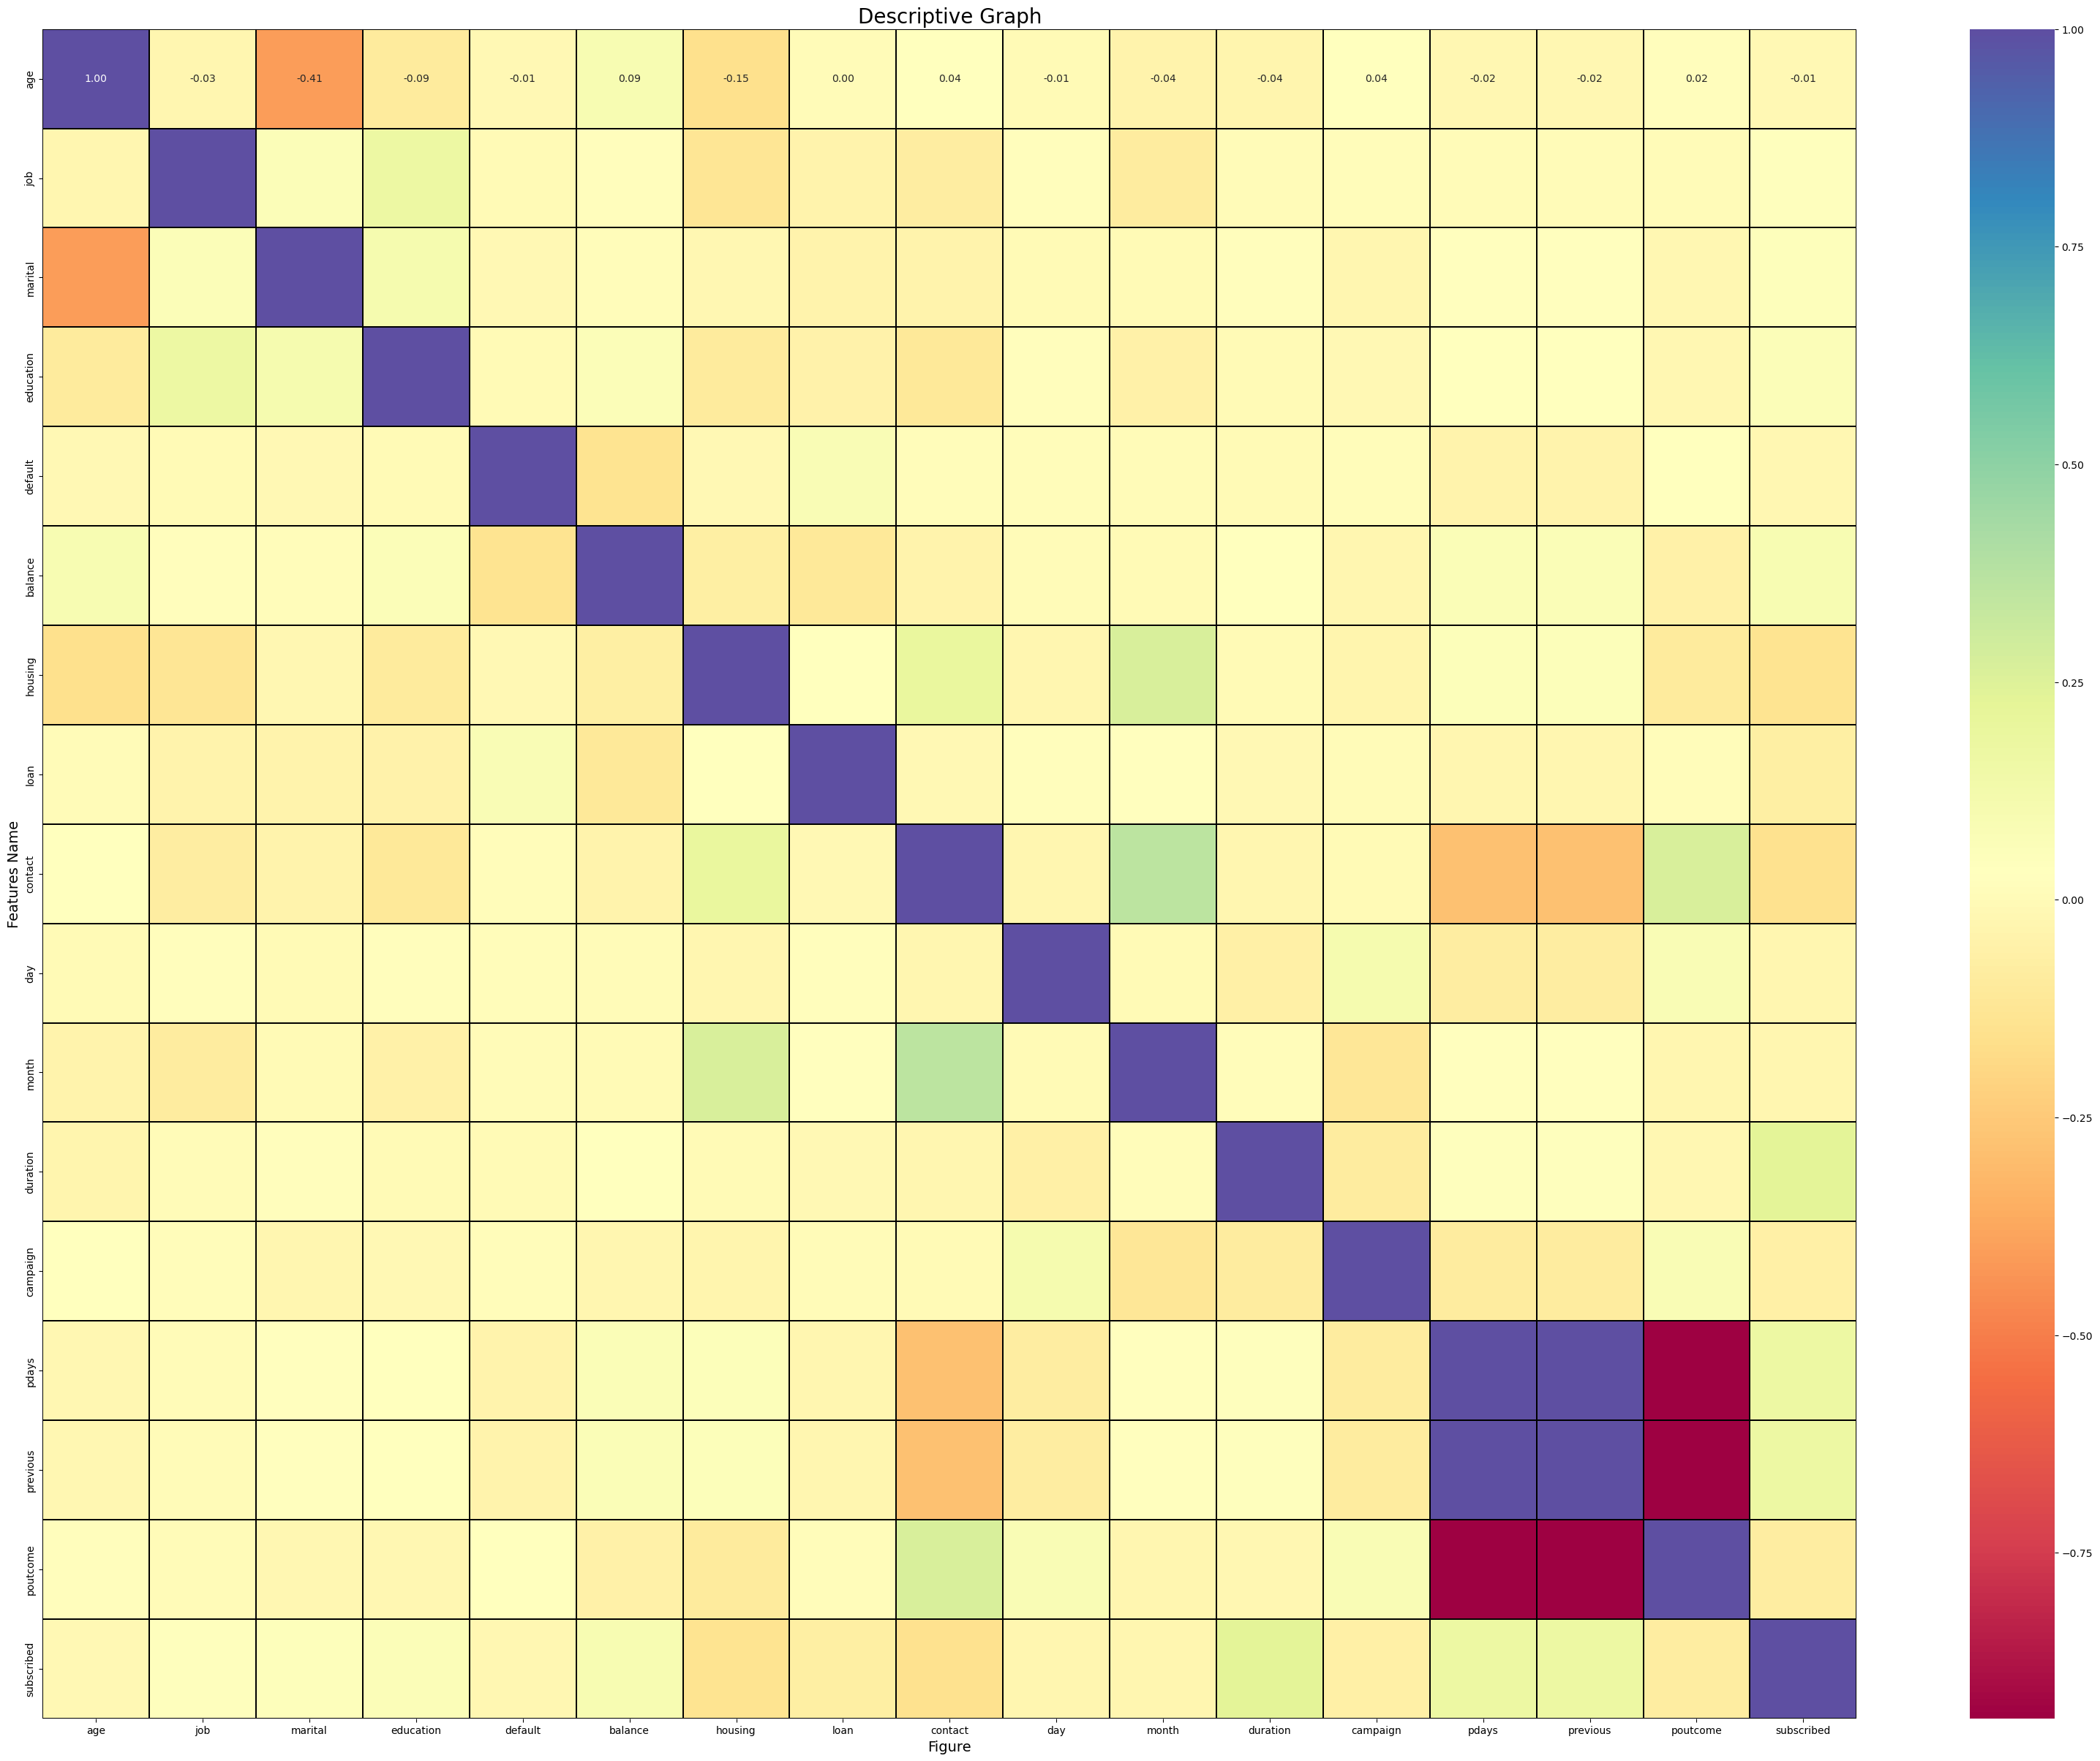

In [66]:
plt.figure(figsize=(40,30))
sns.heatmap(train_data.corr(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='black',cmap="Spectral")
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features Name',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

In [67]:
'''here we assume that pdays and previous each other has perfect positive correlation and (poutcome has negative correaltion 
with pdays or previous) '''

'here we assume that pdays and previous each other has perfect positive correlation and (poutcome has negative correaltion \nwith pdays or previous) '

In [68]:
show_cor=train_data.corr()
show_cor['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.232593
previous      0.171446
pdays         0.171446
balance       0.091858
education     0.066051
marital       0.046043
job           0.038921
age          -0.010913
default      -0.020168
month        -0.028088
day          -0.029600
campaign     -0.067264
loan         -0.072266
poutcome     -0.080895
housing      -0.141092
contact      -0.150051
Name: subscribed, dtype: float64

# Separate feature and label

In [69]:
X=train_data.drop(['subscribed'],axis=1)
Y=train_data['subscribed']

In [70]:
X.shape

(31647, 16)

In [71]:
Y.shape

(31647,)

# Feature Scaling Using Standard Scaler

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.555815,-1.324317,-0.275405,2.369229,-0.137234,1.543629,-1.118201,-0.439893,0.395076,0.379579,1.154007,-1.341527,-0.135701,-0.469852,-0.469852,0.441777
1,-0.963897,2.037729,-0.275405,-0.300345,-0.137234,-0.870871,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.907453,-0.135701,-0.469852,-0.469852,0.441777
2,-1.367051,0.815167,-0.275405,-0.300345,-0.137234,0.240049,0.894294,-0.439893,-0.716695,0.259631,-0.177462,0.468653,-0.915547,-0.469852,-0.469852,0.441777
3,1.656604,-0.101755,-1.922374,1.034442,-0.137234,3.237532,-1.118201,-0.439893,-0.716695,0.739422,0.155405,0.635943,-0.915547,2.128331,2.128331,-0.576498
4,-0.963897,1.426448,-0.275405,-0.300345,-0.137234,-0.725751,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,1.761639,-0.915547,-0.469852,-0.469852,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.165474,-0.101755,1.371563,1.034442,-0.137234,-0.874624,0.894294,-0.439893,-0.716695,-0.460055,0.821140,-0.676563,-0.135701,-0.469852,-0.469852,0.441777
31643,1.253450,-0.101755,-1.922374,1.034442,-0.137234,-0.399230,-1.118201,2.273280,-0.716695,-1.299690,0.155405,2.297305,-0.135701,-0.469852,-0.469852,0.441777
31644,-0.863109,-0.101755,1.371563,1.034442,-0.137234,-0.484301,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,-1.406176,0.644146,-0.469852,-0.469852,0.441777
31645,1.656604,1.426448,-0.275405,-0.300345,-0.137234,-0.593141,0.894294,-0.439893,0.395076,-0.100212,0.821140,-1.544711,0.461425,2.128331,2.128331,-2.613048


# Checking Variance Inflation Factor

In [73]:
# to handle the multicoilarity means two or more ondependent columns highly correlated to each other
from statsmodels.stats.outliers_influence import variance_inflation_factor
multicoil=pd.DataFrame()
multicoil["VIF values"]=[variance_inflation_factor(X.values,col) for col in range(len(X.columns))]
multicoil["Features"]=X.columns
multicoil

,VIF values,Features
0,1.266157,age
1,1.050109,job
2,1.223517,marital
3,1.063181,education
4,1.026253,default
5,1.055136,balance
6,1.175837,housing
7,1.024769,loan
8,1.327991,contact
9,1.025193,day


In [74]:
'''here we see that poutcome has a high VIF values and pdays or previous has a infinite i.e perfect positive correlation.'''

'here we see that poutcome has a high VIF values and pdays or previous has a infinite i.e perfect positive correlation.'

In [75]:
# Drop the poutcome column
X.drop(['poutcome'],axis=1,inplace=True)

In [76]:
# Combine the pdays and previous column
X['pdays_previous'] = X['pdays'] + X['previous']
X.drop(columns=['pdays', 'previous'], inplace=True)

In [77]:
# Check the again VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
multicoil=pd.DataFrame()
multicoil["VIF values"]=[variance_inflation_factor(X.values,col) for col in range(len(X.columns))]
multicoil["Features"]=X.columns
multicoil

,VIF values,Features
0,1.265930,age
1,1.050097,job
2,1.223475,marital
3,1.062646,education
4,1.026248,default
5,1.054812,balance
6,1.159655,housing
7,1.023502,loan
8,1.326955,contact
9,1.025097,day


In [78]:
# Check the target count values
Y.value_counts()

subscribed
0    27932
1     3715
Name: count, dtype: int64

In [79]:
'''here we can assume this is a  imbalanced class problem . So remove the imbalanced data in balance data.'''

'here we can assume this is a  imbalanced class problem . So remove the imbalanced data in balance data.'

In [80]:
# oversampling the data
# !pip install imblearn
!pip install --upgrade scikit-learn imbalanced-learn

In [81]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)

In [82]:
y.value_counts()

subscribed
0    27932
1    27932
Name: count, dtype: int64

# Modeling

In [83]:
# finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
Accuracy_max=0
Random_state_max=0
for random in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=random)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy>Accuracy_max:
        Accuracy_max=accuracy
        Random_state_max=random
print(f"Best accuracy is: {Accuracy_max} at random_state: {Random_state_max}")

Best accuracy is: 0.9510426922044214 at random_state: 94


In [52]:
# with check the logisticc regression
Accuracy_max=0
Random_state_max=0
for random in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=random)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy>Accuracy_max:
        Accuracy_max=accuracy
        Random_state_max=random
print(f"Best accuracy is: {Accuracy_max} at random_state: {Random_state_max}")

In [53]:
# here we see for best accuracy with 94 random state on RandomForestClassifier

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=94)

In [58]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
all_model=[RandomForestClassifier,LogisticRegression,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,DecisionTreeClassifier,KNN,SVC]
for model in all_model:
    obj=model()
    obj.fit(x_train,y_train)
    predict=obj.predict(x_test)
    pred_train= obj.predict(x_train)
    print(f"-------------Accuracy with {str (model)}-----------------")
    print("Accuracy :",accuracy_score(y_test,predict))
    print("Acuracy on trained data :",accuracy_score(y_train,pred_train)*100)
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))
    
    print(f"*******Check the validation Score***********")
    score=cross_val_score(obj,x,y,cv=5)
    print(score)
    print('val-score : ',score.mean())
    print(f"Difference between Accuracy score and cross validation score is : {accuracy_score(y_test,predict)-score.mean()}")
    print()

-------------Accuracy with <class 'sklearn.ensemble._forest.RandomForestClassifier'>-----------------
Accuracy : 0.9494316656224828
Acuracy on trained data : 100.0
[[5186  330]
 [ 235 5422]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5516
           1       0.94      0.96      0.95      5657

    accuracy                           0.95     11173
   macro avg       0.95      0.95      0.95     11173
weighted avg       0.95      0.95      0.95     11173

*******Check the validation Score***********
[0.88203705 0.96088785 0.96061935 0.96249888 0.96043681]
val-score :  0.9452959892026547
Difference between Accuracy score and cross validation score is : 0.004135676419828149

-------------Accuracy with <class 'sklearn.linear_model._logistic.LogisticRegression'>-----------------
Accuracy : 0.7459948089143471
Acuracy on trained data : 73.98133852453515
[[4126 1390]
 [1448 4209]]
              precision    recall  f1-score   support



In [ ]:
'''here  we assume RandomForestClassifier and Bagging Classifier has best accuracy with minimum difference with cv score.'''

# HyperPara Tuning with GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameter = {
              'n_estimators':[25,50,75,100],
                'criterion':['gini','entropy','log_loss'],
                'max_features':['sqrt','log2'],
                'random_state':[20,30,42,50,75],
                'ccp_alpha':[0.0,0.01,0.001]
    
             }

In [64]:
gcv = GridSearchCV(RandomForestClassifier(),parameter,verbose=5,cv=5)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 1125 candidates, totalling 5625 fits
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.927 total time=   0.5s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.928 total time=   0.6s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.927 total time=   0.7s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.931 total time=   0.6s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.932 total time=   0.6s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=10, random_state=30;, score=0.925 total time=   0.6s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=10, random_state=30;, score=0.924 total time=   0.6s
[CV 3/5] END ccp_alpha=0.0, crit

[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=42;, score=0.942 total time=   3.3s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.940 total time=   3.2s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.938 total time=   3.2s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.940 total time=   3.4s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.945 total time=   3.2s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.941 total time=   3.2s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=75;, score=0.940 total time=   3.2s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=75;,

[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=10, random_state=20;, score=0.931 total time=   0.5s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=10, random_state=20;, score=0.932 total time=   0.6s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=10, random_state=30;, score=0.925 total time=   0.6s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=10, random_state=30;, score=0.924 total time=   0.6s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=10, random_state=30;, score=0.929 total time=   0.6s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=10, random_state=30;, score=0.928 total time=   0.6s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=10, random_state=30;, score=0.931 total time=   0.6s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=10, random_state=42;,

[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=50, random_state=50;, score=0.940 total time=   3.4s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=50, random_state=50;, score=0.945 total time=   3.6s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=50, random_state=50;, score=0.941 total time=   3.3s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=50, random_state=75;, score=0.940 total time=   3.5s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=50, random_state=75;, score=0.938 total time=   3.2s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=50, random_state=75;, score=0.943 total time=   3.4s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=50, random_state=75;, score=0.942 total time=   3.5s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=50, random_state=75;,

[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=25, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=25, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=25, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=25, random_state=20;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan tot

[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=75, random_state=50;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=75, random_state=75;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=75, random_state=75;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=75, random_state=75;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=75, random_state=75;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=75, random_state=75;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan t

[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=30;, score=0.939 total time=   2.0s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=30;, score=0.940 total time=   2.0s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.937 total time=   2.1s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.938 total time=   2.0s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.936 total time=   2.1s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.942 total time=   2.1s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.941 total time=   2.1s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimato

[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=75, random_state=75;, score=0.938 total time=   6.4s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=75, random_state=75;, score=0.942 total time=   6.1s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=75, random_state=75;, score=0.946 total time=   5.9s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=75, random_state=75;, score=0.942 total time=   6.4s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.944 total time=   8.0s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.940 total time=   8.3s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.944 total time=   8.1s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=sqrt, n_estim

[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=25, random_state=30;, score=0.939 total time=   2.1s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=25, random_state=30;, score=0.940 total time=   2.1s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.937 total time=   2.0s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.938 total time=   2.2s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.936 total time=   2.0s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.942 total time=   2.0s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.941 total time=   1.8s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimato

[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=75, random_state=75;, score=0.938 total time=   6.1s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=75, random_state=75;, score=0.942 total time=   5.9s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=75, random_state=75;, score=0.946 total time=   5.9s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=75, random_state=75;, score=0.942 total time=   5.9s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.944 total time=   7.9s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.940 total time=   8.1s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.944 total time=   8.0s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estim

[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=None, n_estimators=25, random_state=42;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=None, n_estimators=25, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_features=None, n_estimators=25, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_features=None, n_estimators=25, random_state=50;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_features=None, n_estimators=25, random_state=50;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=None, n_estimators=25, random_state=50;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=None, n_estimators=25, random_state=50;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_features=None, n_estimators=25, random_

[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.927 total time=   0.8s
[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.927 total time=   0.7s
[CV 3/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.929 total time=   0.6s
[CV 4/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.933 total time=   0.8s
[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.930 total time=   0.6s
[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.930 total time=   0.7s
[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.927 total time=   0.8s
[CV 3/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_

[CV 3/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.944 total time=   4.3s
[CV 4/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.946 total time=   4.0s
[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.944 total time=   4.0s
[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.945 total time=   3.8s
[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.939 total time=   3.9s
[CV 3/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.942 total time=   4.2s
[CV 4/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.944 total time=   4.0s
[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_

[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=75;, score=0.944 total time=   8.0s
[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.927 total time=   0.8s
[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.927 total time=   0.8s
[CV 3/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.929 total time=   0.6s
[CV 4/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.933 total time=   0.7s
[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.930 total time=   0.8s
[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=10, random_state=30;, score=0.930 total time=   0.7s
[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n

[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.940 total time=   4.1s
[CV 3/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.944 total time=   4.2s
[CV 4/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.946 total time=   4.5s
[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.944 total time=   4.1s
[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.945 total time=   4.4s
[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.939 total time=   3.9s
[CV 3/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.942 total time=   4.0s
[CV 4/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_

[CV 4/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.946 total time=   7.9s
[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.944 total time=   8.1s
[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimato

[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=50, random_state=75;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=75, random_state=30;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=log_loss, max_features=None, n_estimators=75,

[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=10, random_state=42;, score=0.788 total time=   0.6s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=10, random_state=42;, score=0.789 total time=   0.7s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=10, random_state=42;, score=0.783 total time=   0.6s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=10, random_state=50;, score=0.776 total time=   0.7s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=10, random_state=50;, score=0.783 total time=   0.8s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=10, random_state=50;, score=0.776 total time=   0.7s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=10, random_state=50;, score=0.771 total time=   0.8s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=10, random_st

[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=75, random_state=20;, score=0.775 total time=   5.6s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=75, random_state=20;, score=0.779 total time=   5.4s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=75, random_state=20;, score=0.779 total time=   5.7s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=75, random_state=20;, score=0.770 total time=   5.5s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=75, random_state=30;, score=0.786 total time=   5.6s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=75, random_state=30;, score=0.781 total time=   5.7s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=75, random_state=30;, score=0.780 total time=   5.8s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_features=sqrt, n_estimators=75, random_st

[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=10, random_state=42;, score=0.783 total time=   0.8s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.776 total time=   0.7s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.783 total time=   0.8s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.776 total time=   0.6s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.771 total time=   0.7s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.761 total time=   0.7s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=10, random_state=75;, score=0.765 total time=   0.7s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=10, random_st

[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=75, random_state=20;, score=0.779 total time=   5.4s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=75, random_state=20;, score=0.770 total time=   5.4s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.786 total time=   5.6s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.781 total time=   5.4s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.780 total time=   5.5s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.790 total time=   5.8s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.788 total time=   5.7s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=log2, n_estimators=75, random_st

[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=25, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=25, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=25, random_state=42;, score

[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=75, random_state=75;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=100, random_state=30;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_features=None, n_estimators=100, random_state=30;

[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.785 total time=   2.3s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.795 total time=   2.2s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.785 total time=   2.1s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=50;, score=0.784 total time=   2.1s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=50;, score=0.780 total time=   2.1s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=50;, score=0.787 total time=   2.1s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=50;, score=0.789 total time=   2.3s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_

[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=75, random_state=75;, score=0.786 total time=   7.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.790 total time=   9.6s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.789 total time=   9.8s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.803 total time=   9.9s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.794 total time=   9.3s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.789 total time=   9.3s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=30;, score=0.782 total time=   9.4s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_features=sq

[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.791 total time=   2.2s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.785 total time=   2.3s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.795 total time=   2.2s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.785 total time=   2.3s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=25, random_state=50;, score=0.784 total time=   2.4s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=25, random_state=50;, score=0.780 total time=   2.3s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=25, random_state=50;, score=0.787 total time=   2.1s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_

[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=75, random_state=75;, score=0.794 total time=   6.8s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=75, random_state=75;, score=0.786 total time=   7.3s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.790 total time=   9.6s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.789 total time=   9.7s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.803 total time=   9.6s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.794 total time=   9.6s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.789 total time=   9.8s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_features=log

[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=50, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=50, random_state=20;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=50,

[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=100, random_state=50;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=100, random_state=50;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=100, random_state=75;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=100, random_state=75;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=100, random_state=75;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=100, random_state=75;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_features=None, n_estimators=100, random_state=75;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estima

[CV 1/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=30;, score=0.787 total time=   4.4s
[CV 2/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=30;, score=0.799 total time=   4.4s
[CV 3/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=30;, score=0.801 total time=   4.4s
[CV 4/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=30;, score=0.800 total time=   4.7s
[CV 5/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=30;, score=0.792 total time=   4.9s
[CV 1/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.782 total time=   5.1s
[CV 2/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.794 total time=   4.9s
[CV 3/5] END ccp_alpha=0.01, criterion=log_loss, max_features=

[CV 3/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=50;, score=0.795 total time=   8.8s
[CV 4/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=50;, score=0.790 total time=   9.2s
[CV 5/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=50;, score=0.789 total time=   8.4s
[CV 1/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=75;, score=0.787 total time=   9.0s
[CV 2/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=75;, score=0.790 total time=   8.8s
[CV 3/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=75;, score=0.793 total time=   8.8s
[CV 4/5] END ccp_alpha=0.01, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=75;, score=0.795 total time=   9.1s
[CV 5/5] END ccp_alpha=0.01, criterion=log_loss, max_fe

[CV 5/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=50, random_state=20;, score=0.782 total time=   4.5s
[CV 1/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=50, random_state=30;, score=0.787 total time=   4.4s
[CV 2/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=50, random_state=30;, score=0.799 total time=   4.4s
[CV 3/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=50, random_state=30;, score=0.801 total time=   4.3s
[CV 4/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=50, random_state=30;, score=0.800 total time=   4.3s
[CV 5/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=50, random_state=30;, score=0.792 total time=   4.5s
[CV 1/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.782 total time=   4.2s
[CV 2/5] END ccp_alpha=0.01, criterion=log_loss, max_features=

[CV 2/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=100, random_state=50;, score=0.785 total time=   9.6s
[CV 3/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=100, random_state=50;, score=0.795 total time=   8.8s
[CV 4/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=100, random_state=50;, score=0.790 total time=   9.0s
[CV 5/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=100, random_state=50;, score=0.789 total time=   9.5s
[CV 1/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.787 total time=   9.7s
[CV 2/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.790 total time=   9.6s
[CV 3/5] END ccp_alpha=0.01, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.793 total time=   9.3s
[CV 4/5] END ccp_alpha=0.01, criterion=log_loss, max_fe

[CV 1/5] END ccp_alpha=0.01, criterion=log_loss, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=log_loss, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=log_loss, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=log_loss, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=log_loss, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=log_loss, max_features=None, n_estimators=50, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=log_loss, max_features=None, n_estimators=50, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=log_loss, max_features=None, n_estima

[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.833 total time=   0.8s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.835 total time=   0.7s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.839 total time=   0.7s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.843 total time=   0.8s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=10, random_state=20;, score=0.834 total time=   0.8s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=10, random_state=30;, score=0.828 total time=   0.6s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=10, random_state=30;, score=0.838 total time=   0.7s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=10, r

[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=50, random_state=42;, score=0.851 total time=   4.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=50, random_state=42;, score=0.846 total time=   3.9s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.842 total time=   3.7s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.836 total time=   3.8s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.845 total time=   3.9s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.850 total time=   3.6s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=50, random_state=50;, score=0.845 total time=   4.1s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=sqrt, n_estimators=50, r

[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=10, random_state=20;, score=0.835 total time=   0.9s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=10, random_state=20;, score=0.839 total time=   0.8s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=10, random_state=20;, score=0.843 total time=   0.8s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=10, random_state=20;, score=0.834 total time=   0.9s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=10, random_state=30;, score=0.828 total time=   0.9s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=10, random_state=30;, score=0.838 total time=   0.8s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=10, random_state=30;, score=0.842 total time=   0.8s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=10, r

[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=50, random_state=42;, score=0.846 total time=   4.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=50, random_state=50;, score=0.842 total time=   4.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=50, random_state=50;, score=0.836 total time=   3.6s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=50, random_state=50;, score=0.845 total time=   4.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=50, random_state=50;, score=0.850 total time=   4.1s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=50, random_state=50;, score=0.845 total time=   4.1s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=50, random_state=75;, score=0.841 total time=   4.2s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_features=log2, n_estimators=50, r

[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=25, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=25, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=25, random_state=50;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=25, random_state=50;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=25, random_state=50;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=25, random_state=50;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=25, random_state=50;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=25, random_state=75

[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=100, random_state=30;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=100, random_state=30;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=100, random_state=30;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=100, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=100, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=100, random_state=42;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=100, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_features=None, n_estimators=100, random_

[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=50;, score=0.862 total time=   2.2s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=75;, score=0.858 total time=   2.6s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=75;, score=0.857 total time=   2.7s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=75;, score=0.859 total time=   2.4s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=75;, score=0.866 total time=   2.6s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=75;, score=0.865 total time=   2.5s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=50, random_state=20;, score=0.863 total time=   4.9s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_features=

[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=30;, score=0.864 total time=  11.2s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=30;, score=0.867 total time=  11.5s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=30;, score=0.871 total time=   9.7s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=30;, score=0.865 total time=   9.6s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=42;, score=0.864 total time=   9.4s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=42;, score=0.864 total time=   9.2s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=42;, score=0.867 total time=   9.6s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_fe

[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=25, random_state=50;, score=0.860 total time=   2.4s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=25, random_state=50;, score=0.864 total time=   2.5s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=25, random_state=50;, score=0.862 total time=   2.2s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=25, random_state=75;, score=0.858 total time=   2.2s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=25, random_state=75;, score=0.857 total time=   2.3s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=25, random_state=75;, score=0.859 total time=   2.2s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=25, random_state=75;, score=0.866 total time=   2.4s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_features=

[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.866 total time=   9.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=100, random_state=30;, score=0.866 total time=   8.7s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=100, random_state=30;, score=0.864 total time=   9.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=100, random_state=30;, score=0.867 total time=   8.7s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=100, random_state=30;, score=0.871 total time=   8.7s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=100, random_state=30;, score=0.865 total time=   8.8s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_features=log2, n_estimators=100, random_state=42;, score=0.864 total time=   9.5s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_fe

[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_features=None, n_estimators=50, random_state=75;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_features=None, n_estimators=50, random_state=75;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_features=None, n_estimators=50, random_state=75;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_features=None, n_estima

[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.865 total time=   0.9s
[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.853 total time=   1.0s
[CV 1/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.856 total time=   0.9s
[CV 2/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.850 total time=   0.9s
[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.858 total time=   0.8s
[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.865 total time=   0.9s
[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.863 total time=   0.9s
[CV 1/5] END ccp_alpha=0.001, criterion=log_loss, max_f

[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.865 total time=   4.3s
[CV 1/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.862 total time=   4.7s
[CV 2/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.862 total time=   4.6s
[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.865 total time=   4.6s
[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.868 total time=   4.4s
[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.867 total time=   4.5s
[CV 1/5] END ccp_alpha=0.001, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=75;, score=0.862 total time=   4.4s
[CV 2/5] END ccp_alpha=0.001, criterion=log_loss, max_f

[CV 1/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.856 total time=   0.7s
[CV 2/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.856 total time=   0.8s
[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.862 total time=   0.7s
[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.865 total time=   0.8s
[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.853 total time=   0.8s
[CV 1/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=10, random_state=30;, score=0.856 total time=   0.9s
[CV 2/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=10, random_state=30;, score=0.850 total time=   0.8s
[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_f

[CV 2/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.864 total time=   4.6s
[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.867 total time=   4.9s
[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.873 total time=   4.7s
[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.865 total time=   4.7s
[CV 1/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.862 total time=   4.5s
[CV 2/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.862 total time=   4.6s
[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.865 total time=   4.5s
[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_f

[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.868 total time=   9.1s
[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.873 total time=   9.4s
[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.870 total time=   8.7s
[CV 1/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_featur

[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=50, random_state=75;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=50, random_state=75;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=50, random_state=75;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=log_loss, max_features=None, 

[CV 5/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=10, random_state=30;, score=0.758 total time=   0.7s
[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=10, random_state=42;, score=0.771 total time=   0.7s
[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=10, random_state=42;, score=0.778 total time=   0.7s
[CV 3/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=10, random_state=42;, score=0.775 total time=   0.6s
[CV 4/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=10, random_state=42;, score=0.780 total time=   0.7s
[CV 5/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=10, random_state=42;, score=0.771 total time=   0.7s
[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=10, random_state=50;, score=0.762 total time=   0.8s
[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=10, random_st

[CV 4/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=50, random_state=75;, score=0.758 total time=   3.8s
[CV 5/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=50, random_state=75;, score=0.766 total time=   3.7s
[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=75, random_state=20;, score=0.758 total time=   5.6s
[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=75, random_state=20;, score=0.760 total time=   5.8s
[CV 3/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=75, random_state=20;, score=0.770 total time=   5.6s
[CV 4/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=75, random_state=20;, score=0.764 total time=   6.0s
[CV 5/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=75, random_state=20;, score=0.762 total time=   5.8s
[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=sqrt, n_estimators=75, random_st

[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=10, random_state=42;, score=0.778 total time=   0.7s
[CV 3/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=10, random_state=42;, score=0.775 total time=   0.7s
[CV 4/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=10, random_state=42;, score=0.780 total time=   0.8s
[CV 5/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=10, random_state=42;, score=0.771 total time=   0.6s
[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.762 total time=   0.8s
[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.763 total time=   0.7s
[CV 3/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.772 total time=   0.6s
[CV 4/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=10, random_st

[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=75, random_state=20;, score=0.758 total time=   6.2s
[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=75, random_state=20;, score=0.760 total time=   5.9s
[CV 3/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=75, random_state=20;, score=0.770 total time=   5.8s
[CV 4/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=75, random_state=20;, score=0.764 total time=   5.5s
[CV 5/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=75, random_state=20;, score=0.762 total time=   5.4s
[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.767 total time=   5.6s
[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.769 total time=   5.8s
[CV 3/5] END ccp_alpha=0.02, criterion=gini, max_features=log2, n_estimators=75, random_st

[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=25, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=25, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=25, random_state=42;, score

[CV 4/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=75, random_state=75;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=75, random_state=75;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=100, random_state=20;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.02, criterion=gini, max_features=None, n_estimators=100, random_state=30;,

[CV 2/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.767 total time=   2.3s
[CV 3/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.777 total time=   2.5s
[CV 4/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.780 total time=   2.2s
[CV 5/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=42;, score=0.766 total time=   2.3s
[CV 1/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=50;, score=0.756 total time=   2.3s
[CV 2/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=50;, score=0.761 total time=   2.3s
[CV 3/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=25, random_state=50;, score=0.769 total time=   2.4s
[CV 4/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_

[CV 4/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=75, random_state=75;, score=0.774 total time=   7.1s
[CV 5/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=75, random_state=75;, score=0.772 total time=   7.3s
[CV 1/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.766 total time=   9.7s
[CV 2/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.777 total time=   9.9s
[CV 3/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.779 total time=   9.6s
[CV 4/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.773 total time=  10.2s
[CV 5/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=20;, score=0.769 total time=   9.5s
[CV 1/5] END ccp_alpha=0.02, criterion=entropy, max_features=sqr

[CV 1/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.765 total time=   2.3s
[CV 2/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.767 total time=   2.4s
[CV 3/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.777 total time=   2.4s
[CV 4/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.780 total time=   2.4s
[CV 5/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=25, random_state=42;, score=0.766 total time=   2.2s
[CV 1/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=25, random_state=50;, score=0.756 total time=   2.5s
[CV 2/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=25, random_state=50;, score=0.761 total time=   2.5s
[CV 3/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_

[CV 3/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=75, random_state=75;, score=0.768 total time=   7.3s
[CV 4/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=75, random_state=75;, score=0.774 total time=   7.2s
[CV 5/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=75, random_state=75;, score=0.772 total time=   7.5s
[CV 1/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.766 total time=   9.6s
[CV 2/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.777 total time=   9.7s
[CV 3/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.779 total time=   9.5s
[CV 4/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2, n_estimators=100, random_state=20;, score=0.773 total time=  10.0s
[CV 5/5] END ccp_alpha=0.02, criterion=entropy, max_features=log2

[CV 5/5] END ccp_alpha=0.02, criterion=entropy, max_features=None, n_estimators=50, random_state=30;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.02, criterion=entropy, max_features=None, n_estimators=50, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.02, criterion=entropy, max_features=None, n_estimators=50, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.02, criterion=entropy, max_features=None, n_estimators=50, random_state=42;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.02, criterion=entropy, max_features=None, n_estimators=50, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.02, criterion=entropy, max_features=None, n_estimators=50, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.02, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.02, criterion=entropy, max_features=None, n_estimators=50,

[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.766 total time=   0.7s
[CV 2/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.780 total time=   0.8s
[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.780 total time=   0.9s
[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.785 total time=   0.8s
[CV 5/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.767 total time=   0.9s
[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.774 total time=   0.9s
[CV 2/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.783 total time=   0.8s
[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=

[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.775 total time=   4.7s
[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.781 total time=   4.8s
[CV 5/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.768 total time=   4.8s
[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.757 total time=   4.8s
[CV 2/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.763 total time=   4.8s
[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.770 total time=   4.7s
[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.771 total time=   4.6s
[CV 5/5] END ccp_alpha=0.02, criterion=log_loss, max_features=

[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=75;, score=0.778 total time=   9.3s
[CV 5/5] END ccp_alpha=0.02, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=75;, score=0.772 total time=   9.1s
[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.766 total time=   0.8s
[CV 2/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.780 total time=   0.9s
[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.780 total time=   0.9s
[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.785 total time=   0.9s
[CV 5/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.767 total time=   0.9s
[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_feature

[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.761 total time=   4.6s
[CV 2/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.771 total time=   4.9s
[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.775 total time=   4.6s
[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.781 total time=   4.9s
[CV 5/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.768 total time=   4.5s
[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.757 total time=   4.5s
[CV 2/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.763 total time=   4.7s
[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=

[CV 2/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.771 total time=   9.2s
[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.771 total time=   9.2s
[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.778 total time=   9.1s
[CV 5/5] END ccp_alpha=0.02, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.772 total time=   8.8s
[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=No

[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=75, random_state=20;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=75, random_state=30;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=75, random_state=30;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=75, random_state=30;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=75, random_state=30;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estimators=75, random_state=30;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.02, criterion=log_loss, max_features=None, n_estima

[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=10, random_state=50;, score=0.753 total time=   0.7s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=10, random_state=50;, score=0.759 total time=   0.8s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=10, random_state=50;, score=0.738 total time=   0.7s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=10, random_state=50;, score=0.743 total time=   0.7s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=10, random_state=75;, score=0.717 total time=   0.8s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=10, random_state=75;, score=0.717 total time=   0.7s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=10, random_state=75;, score=0.728 total time=   0.8s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=10, random_st

[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=75, random_state=30;, score=0.733 total time=   5.6s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=75, random_state=30;, score=0.722 total time=   5.8s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=75, random_state=30;, score=0.736 total time=   5.9s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=75, random_state=30;, score=0.723 total time=   5.7s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=75, random_state=30;, score=0.731 total time=   5.7s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=75, random_state=42;, score=0.731 total time=   5.6s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=75, random_state=42;, score=0.722 total time=   5.7s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=sqrt, n_estimators=75, random_st

[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.738 total time=   0.7s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=10, random_state=50;, score=0.743 total time=   0.9s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=10, random_state=75;, score=0.717 total time=   0.7s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=10, random_state=75;, score=0.717 total time=   0.9s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=10, random_state=75;, score=0.728 total time=   0.8s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=10, random_state=75;, score=0.717 total time=   0.8s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=10, random_state=75;, score=0.713 total time=   0.7s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=25, random_st

[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.736 total time=   5.9s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.723 total time=   6.1s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=75, random_state=30;, score=0.731 total time=   6.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=75, random_state=42;, score=0.731 total time=   6.0s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=75, random_state=42;, score=0.722 total time=   5.8s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=75, random_state=42;, score=0.733 total time=   6.1s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=75, random_state=42;, score=0.724 total time=   6.4s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_features=log2, n_estimators=75, random_st

[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=25, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=25, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=25, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=25, random_state=20;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=25, random_state=30;, score

[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=100, random_state=75;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=100, random_state=75;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=100, random_state=75;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_features=None, n_estimators=100, random_state=75;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=10, random_state=20;, score=0.753 total time=   1.0s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=10, random_state=20;, score=0.763 total time=   0.8s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=10, random_state=20;, score=0.766 total time=   0.9s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=10, r

[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=50, random_state=30;, score=0.738 total time=   4.9s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=50, random_state=30;, score=0.731 total time=   4.7s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=50, random_state=42;, score=0.741 total time=   4.8s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=50, random_state=42;, score=0.733 total time=   4.8s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=50, random_state=42;, score=0.742 total time=   5.0s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=50, random_state=42;, score=0.742 total time=   5.1s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=50, random_state=42;, score=0.764 total time=   4.4s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_

[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=75;, score=0.757 total time=  10.3s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=75;, score=0.760 total time=   9.8s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=75;, score=0.760 total time=   9.9s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=75;, score=0.763 total time=   9.5s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_features=sqrt, n_estimators=100, random_state=75;, score=0.761 total time=   9.4s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=10, random_state=20;, score=0.753 total time=   1.0s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=10, random_state=20;, score=0.763 total time=   0.8s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_features=log

[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=50, random_state=30;, score=0.746 total time=   4.5s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=50, random_state=30;, score=0.738 total time=   5.0s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=50, random_state=30;, score=0.731 total time=   4.7s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=50, random_state=42;, score=0.741 total time=   4.9s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=50, random_state=42;, score=0.733 total time=   4.7s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=50, random_state=42;, score=0.742 total time=   4.7s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=50, random_state=42;, score=0.742 total time=   4.9s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_

[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=100, random_state=50;, score=0.739 total time=   9.3s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=100, random_state=75;, score=0.757 total time=   9.9s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=100, random_state=75;, score=0.760 total time=   9.1s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=100, random_state=75;, score=0.760 total time=   9.4s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=100, random_state=75;, score=0.763 total time=   9.2s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_features=log2, n_estimators=100, random_state=75;, score=0.761 total time=  10.0s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_features=None

[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_features=None, n_estimators=50, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_features=None, n_estimators=50, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=entropy, max_features=None, n_estimators=50, random_state=50;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=entropy, max_features=None, n_estimators=50,

[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.763 total time=   0.8s
[CV 3/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.766 total time=   0.8s
[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.764 total time=   0.8s
[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=20;, score=0.763 total time=   0.8s
[CV 1/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.721 total time=   0.8s
[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.733 total time=   0.9s
[CV 3/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=10, random_state=30;, score=0.751 total time=   0.9s
[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=

[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.742 total time=   4.5s
[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=42;, score=0.764 total time=   4.5s
[CV 1/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.750 total time=   4.7s
[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.753 total time=   4.7s
[CV 3/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.758 total time=   4.5s
[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.749 total time=   4.6s
[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=50, random_state=50;, score=0.750 total time=   4.4s
[CV 1/5] END ccp_alpha=0.05, criterion=log_loss, max_features=

[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=sqrt, n_estimators=100, random_state=75;, score=0.761 total time=   9.1s
[CV 1/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.753 total time=   0.8s
[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.763 total time=   0.8s
[CV 3/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.766 total time=   0.8s
[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.764 total time=   0.9s
[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=10, random_state=20;, score=0.763 total time=   0.8s
[CV 1/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=10, random_state=30;, score=0.721 total time=   0.8s
[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features

[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.733 total time=   4.4s
[CV 3/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.742 total time=   4.3s
[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.742 total time=   4.7s
[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=50, random_state=42;, score=0.764 total time=   4.5s
[CV 1/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.750 total time=   4.5s
[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.753 total time=   4.3s
[CV 3/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=50, random_state=50;, score=0.758 total time=   4.5s
[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=

[CV 3/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.760 total time=  10.0s
[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.763 total time=   9.8s
[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=log2, n_estimators=100, random_state=75;, score=0.761 total time=   9.1s
[CV 1/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=10, random_state=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None,

[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=75, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=75, random_state=50;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=75, random_state=50;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=75, random_state=50;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=75, random_state=50;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=75, random_state=50;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estimators=75, random_state=75;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=log_loss, max_features=None, n_estima

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.001, 0.02, 0.05],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [10, 25, 50, 75, 100],
                         'random_state': [20, 30, 42, 50, 75]},
             verbose=5)

In [65]:
gcv.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 42}

In [66]:
gcv.best_score_

0.944328844182986

In [73]:
final_model=RandomForestClassifier(criterion='entropy',ccp_alpha=0.0,n_estimators=100,random_state=42,max_features='sqrt')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

95.22062114024882


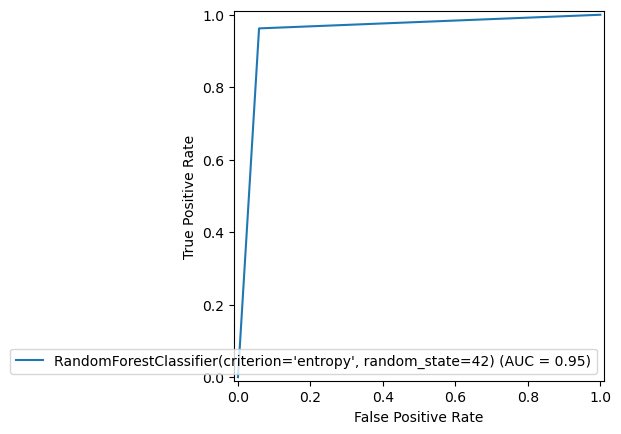

In [74]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

# Saved the model

In [70]:
#  Saving the model using .pkl
import joblib
joblib.dump(final_model,"Bank_Marketing.pkl")

['Bank_Marketing.pkl']

In [71]:
# lets load the saved model and get the predictions
model=joblib.load("Bank_Marketing.pkl")

# prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 0])

In [72]:
# compare with actual data
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
11168,0,0
11169,0,0
11170,1,1
11171,1,0


# For test Data

In [86]:
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [88]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
oe=LabelEncoder()
for col in test_data.columns:
    if(test_data[col].dtypes=='object'):
        test_data[col]=oe.fit_transform(test_data[col].values.reshape(-1,1))
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test_data=pd.DataFrame(scaler.fit_transform(test_data),columns=test_data.columns)
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.402389,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-0.921849,1.058702,-0.418199,-0.297500,0.452163
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,0.463375,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.439963,-0.574850,-0.418199,-0.297500,0.452163
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.393955,0.893033,-0.429564,1.531969,0.031534,0.829938,1.616074,-0.574850,-0.418199,-0.297500,0.452163
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,0.784508,0.893033,-0.429564,0.413763,-0.330440,0.829938,-0.747754,-0.248140,-0.418199,-0.297500,0.452163
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-0.669352,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.569789,-0.574850,-0.418199,-0.297500,0.452163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.177969,-0.108636,-0.276592,1.040875,-0.131336,-0.426069,-1.119779,-0.429564,-0.704444,1.479434,-1.493340,-0.426644,0.405281,-0.418199,-0.297500,0.452163
13560,1.236630,-1.024823,-0.276592,-1.642982,-0.131336,0.299239,0.893033,-0.429564,1.531969,0.514168,0.166144,-0.387957,-0.574850,-0.418199,-0.297500,0.452163
13561,-0.555195,0.196760,-0.276592,-1.642982,-0.131336,-0.348218,0.893033,-0.429564,-0.704444,1.600092,-0.497650,-0.473070,-0.574850,-0.418199,-0.297500,0.452163
13562,-1.121034,-1.330219,1.360988,-0.301053,-0.131336,-0.290155,-1.119779,-0.429564,-0.704444,-0.813073,1.161835,-0.194517,-0.248140,0.483926,1.203911,-0.542830


In [90]:
# Drop the poutcome column
test_data.drop(['poutcome'],axis=1,inplace=True)

In [92]:
# Combine the pdays and previous column
test_data['pdays_previous'] = test_data['pdays'] + test_data['previous']
test_data.drop(columns=['pdays', 'previous'], inplace=True)

In [93]:
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays_previous
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.402389,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-0.921849,1.058702,-0.715700
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,0.463375,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.439963,-0.574850,-0.715700
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.393955,0.893033,-0.429564,1.531969,0.031534,0.829938,1.616074,-0.574850,-0.715700
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,0.784508,0.893033,-0.429564,0.413763,-0.330440,0.829938,-0.747754,-0.248140,-0.715700
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-0.669352,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.569789,-0.574850,-0.715700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.177969,-0.108636,-0.276592,1.040875,-0.131336,-0.426069,-1.119779,-0.429564,-0.704444,1.479434,-1.493340,-0.426644,0.405281,-0.715700
13560,1.236630,-1.024823,-0.276592,-1.642982,-0.131336,0.299239,0.893033,-0.429564,1.531969,0.514168,0.166144,-0.387957,-0.574850,-0.715700
13561,-0.555195,0.196760,-0.276592,-1.642982,-0.131336,-0.348218,0.893033,-0.429564,-0.704444,1.600092,-0.497650,-0.473070,-0.574850,-0.715700
13562,-1.121034,-1.330219,1.360988,-0.301053,-0.131336,-0.290155,-1.119779,-0.429564,-0.704444,-0.813073,1.161835,-0.194517,-0.248140,1.687837


# Predict the result

In [96]:
# lets load the saved model and get the predictions
import joblib
model=joblib.load("Bank_Marketing.pkl")

# prediction
predict_test=model.predict(test_data)
predict_test

array([0, 1, 1, ..., 1, 1, 1])